# Integration Tests 

In [1]:
## Import the Forest-Guided Clustering package
from fgclustering import FgClustering

## Imports for datasets
from palmerpenguins import load_penguins
from sklearn.datasets import load_breast_cancer, load_iris, fetch_california_housing

## Additional imports for use-cases
import pandas as pd

from sklearn.datasets import make_classification, make_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Binary Classification: Breast Cancer Dataset

In [2]:
data_breast_cancer = load_breast_cancer(as_frame=True)
data_breast_cancer = data_breast_cancer.frame
data_breast_cancer['target'] = data_breast_cancer['target'].map({0: 'malignant', 1: 'benign'})

X_breast_cancer = data_breast_cancer.loc[:, data_breast_cancer.columns != 'target']
y_breast_cancer = data_breast_cancer.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_breast_cancer, y_breast_cancer)
rf_breast_cancer = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_breast_cancer.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9543057996485061


In [3]:
fgc = FgClustering(model=rf_breast_cancer, data=data_breast_cancer, target_column='target')
fgc.run(max_K=4)

Interpreting RandomForestClassifier


 50%|█████     | 1/2 [00:01<00:01,  1.40s/it]

For number of cluster 2 the Jaccard Index is 0.9977762891115787
For number of cluster 2 the score is 0.06613635989234057


100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

For number of cluster 3 the Jaccard Index is 0.8861827734206449
For number of cluster 3 the score is 0.07478999977783318
Optimal number of cluster is: 2


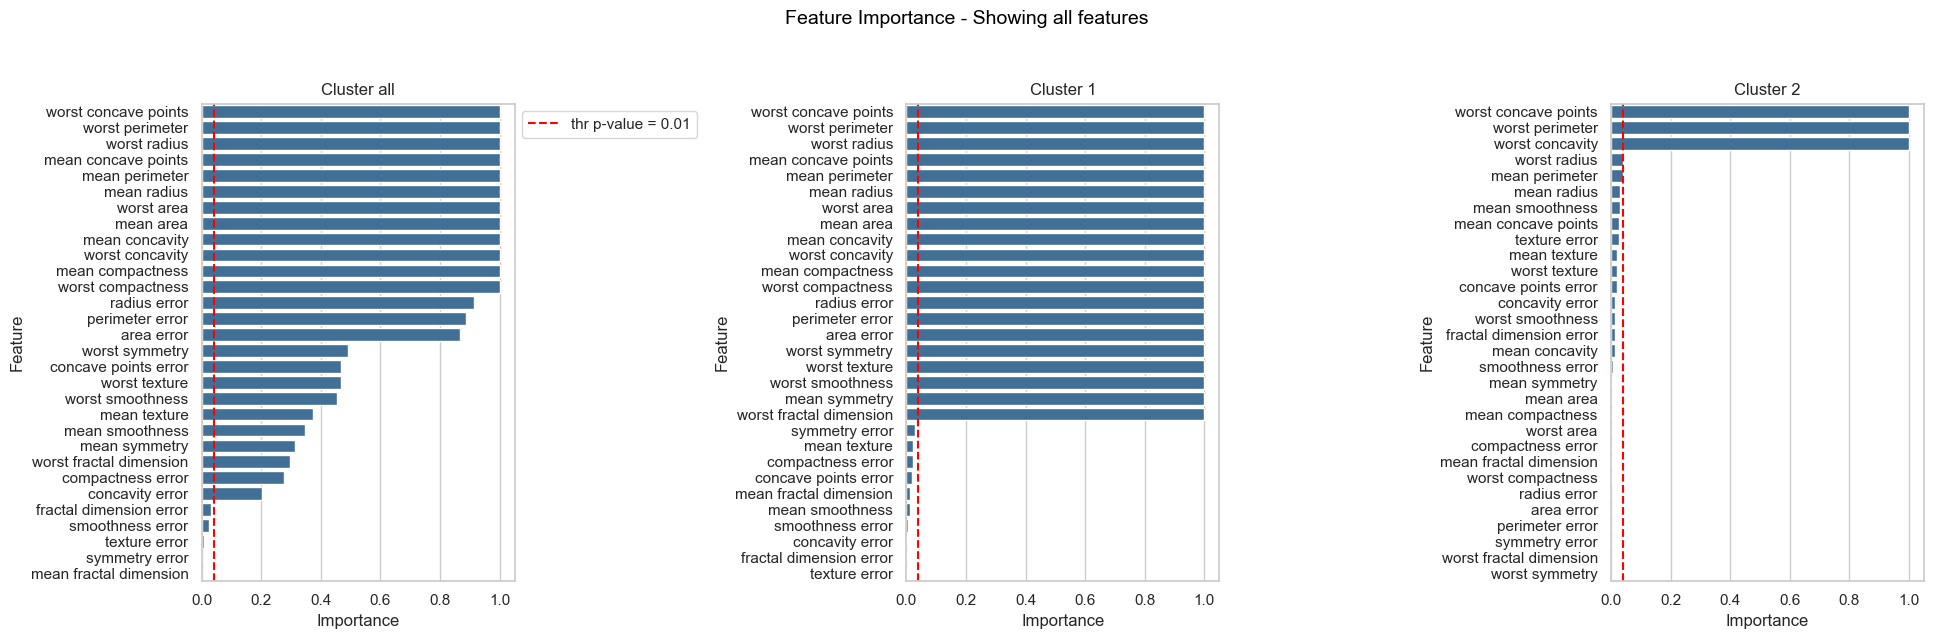

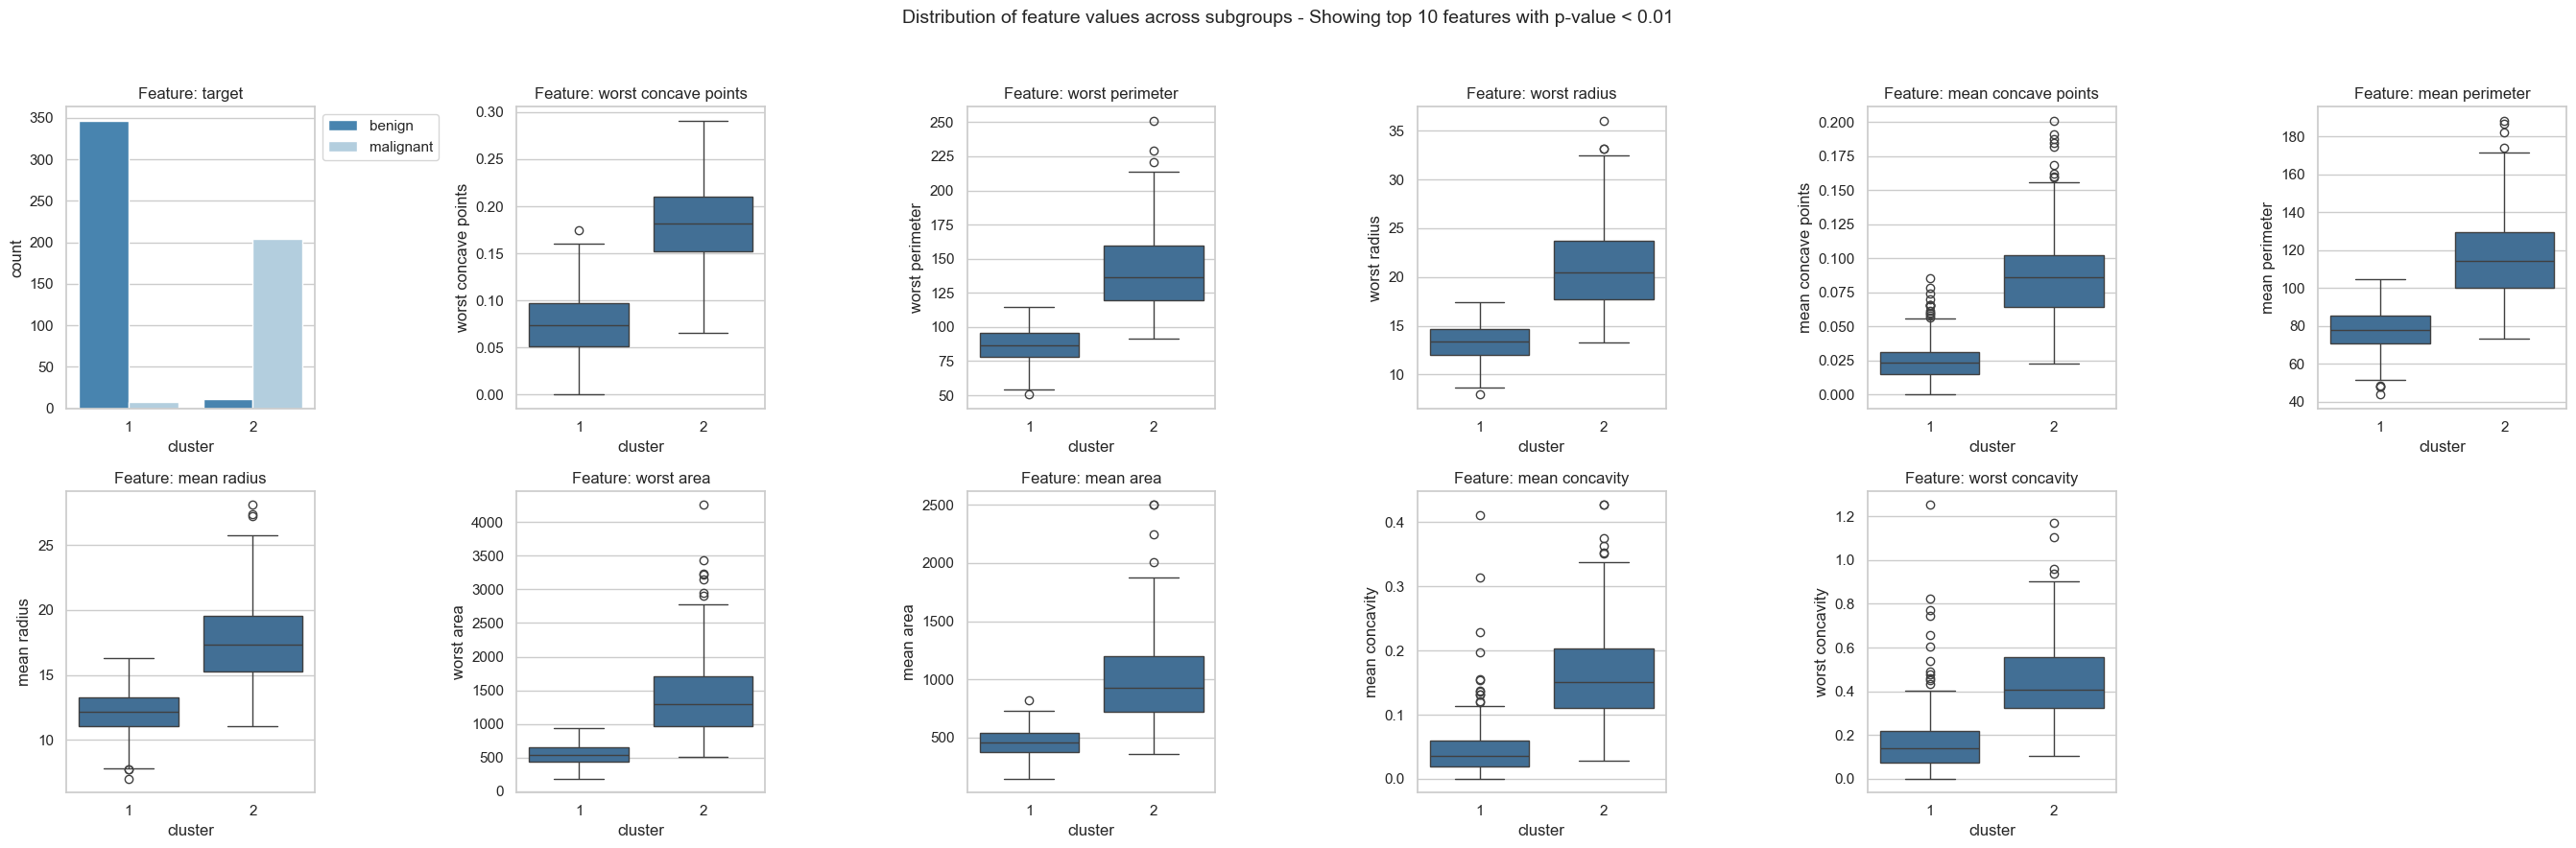

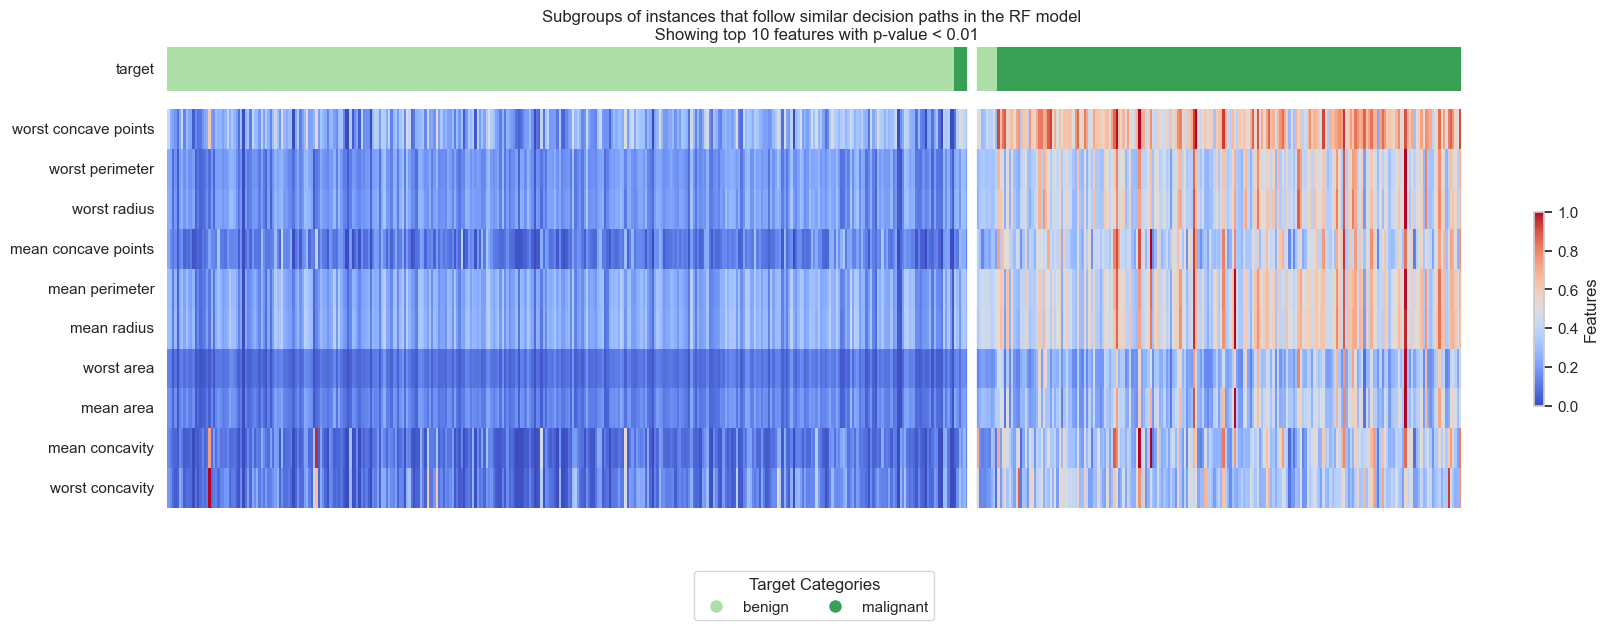

In [4]:
fgc.plot_feature_importance(thr_pvalue=0.01)
fgc.plot_decision_paths(thr_pvalue=0.01, top_n=10, num_cols=6)

## Multiclass Classification: Iris Dataset

In [5]:
data_iris = load_iris(as_frame=True)
data_iris = data_iris.frame
data_iris['target'] = data_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

X_iris = data_iris.loc[:, data_iris.columns != 'target']
y_iris = data_iris.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_iris, y_iris)
rf_iris = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_iris.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9533333333333334


In [6]:
fgc = FgClustering(model=rf_iris, data=data_iris, target_column='target')
fgc.run()

Interpreting RandomForestClassifier


 17%|█▋        | 1/6 [00:00<00:00,  8.79it/s]

For number of cluster 2 the Jaccard Index is 0.5921149836555343
Clustering is instable, no score computed!


 33%|███▎      | 2/6 [00:00<00:00,  6.21it/s]

For number of cluster 3 the Jaccard Index is 1.0
For number of cluster 3 the score is 0.0630091172123111


 50%|█████     | 3/6 [00:00<00:00,  4.77it/s]

For number of cluster 4 the Jaccard Index is 0.4200836940836941
Clustering is instable, no score computed!


 67%|██████▋   | 4/6 [00:00<00:00,  4.05it/s]

For number of cluster 5 the Jaccard Index is 0.40768160352719185
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [00:01<00:00,  3.37it/s]

For number of cluster 6 the Jaccard Index is 0.5419166666666668
Clustering is instable, no score computed!


100%|██████████| 6/6 [00:01<00:00,  3.43it/s]

For number of cluster 7 the Jaccard Index is 0.5421904761904761
Clustering is instable, no score computed!
Optimal number of cluster is: 3


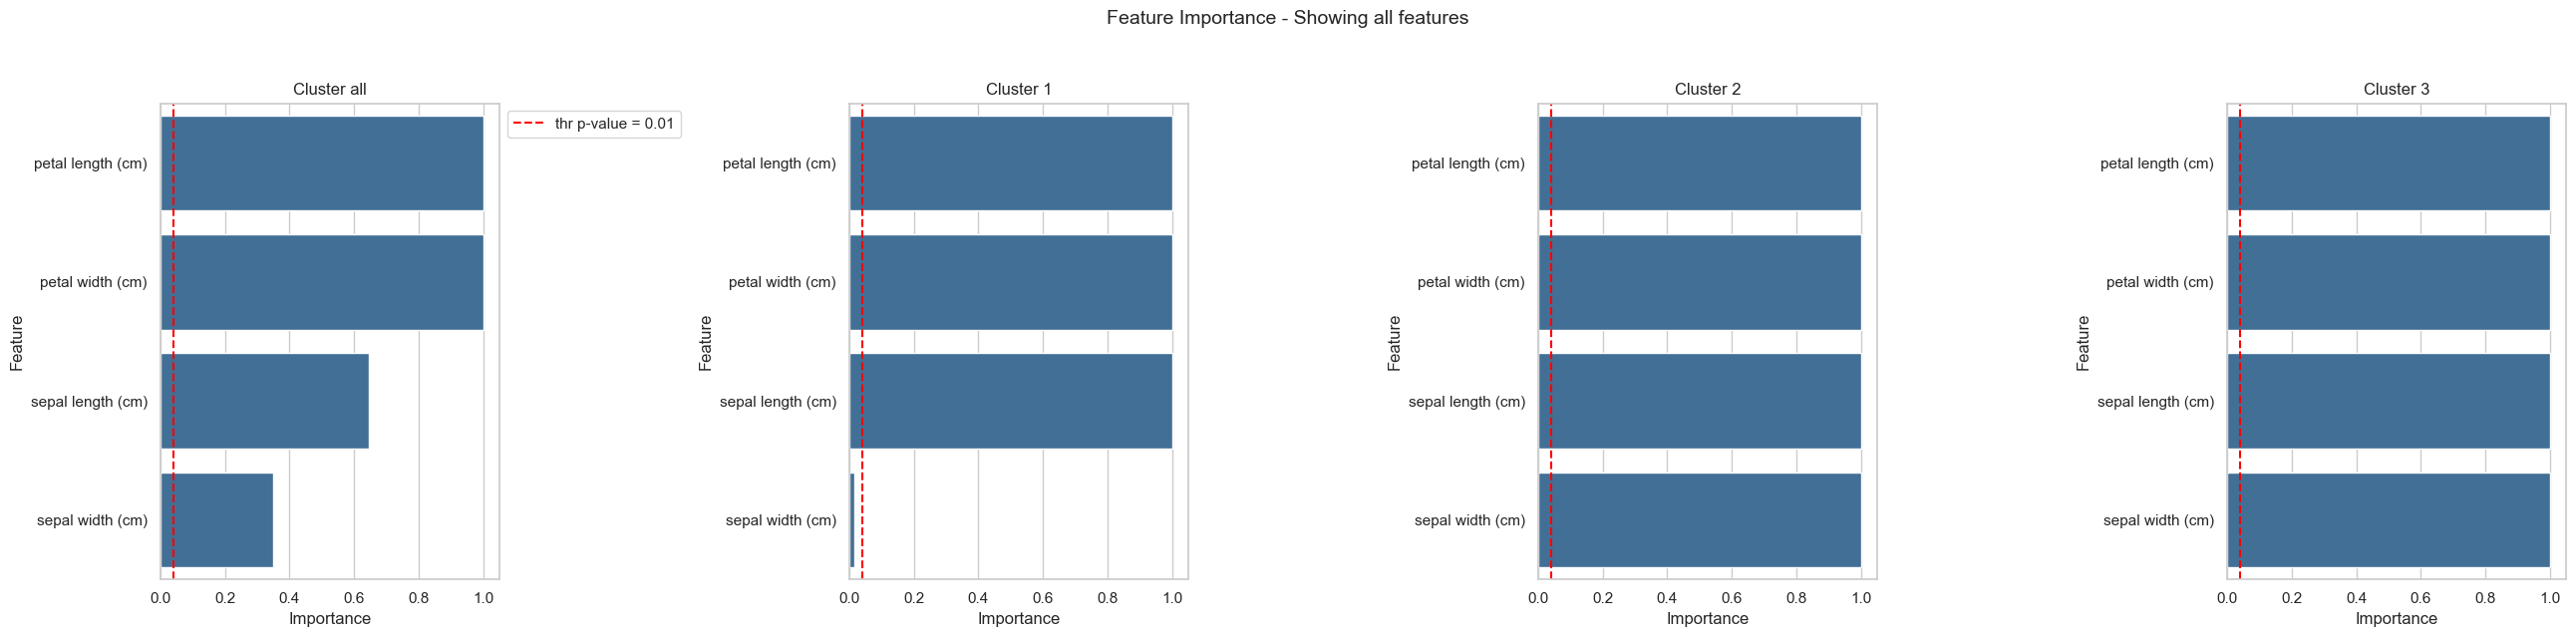

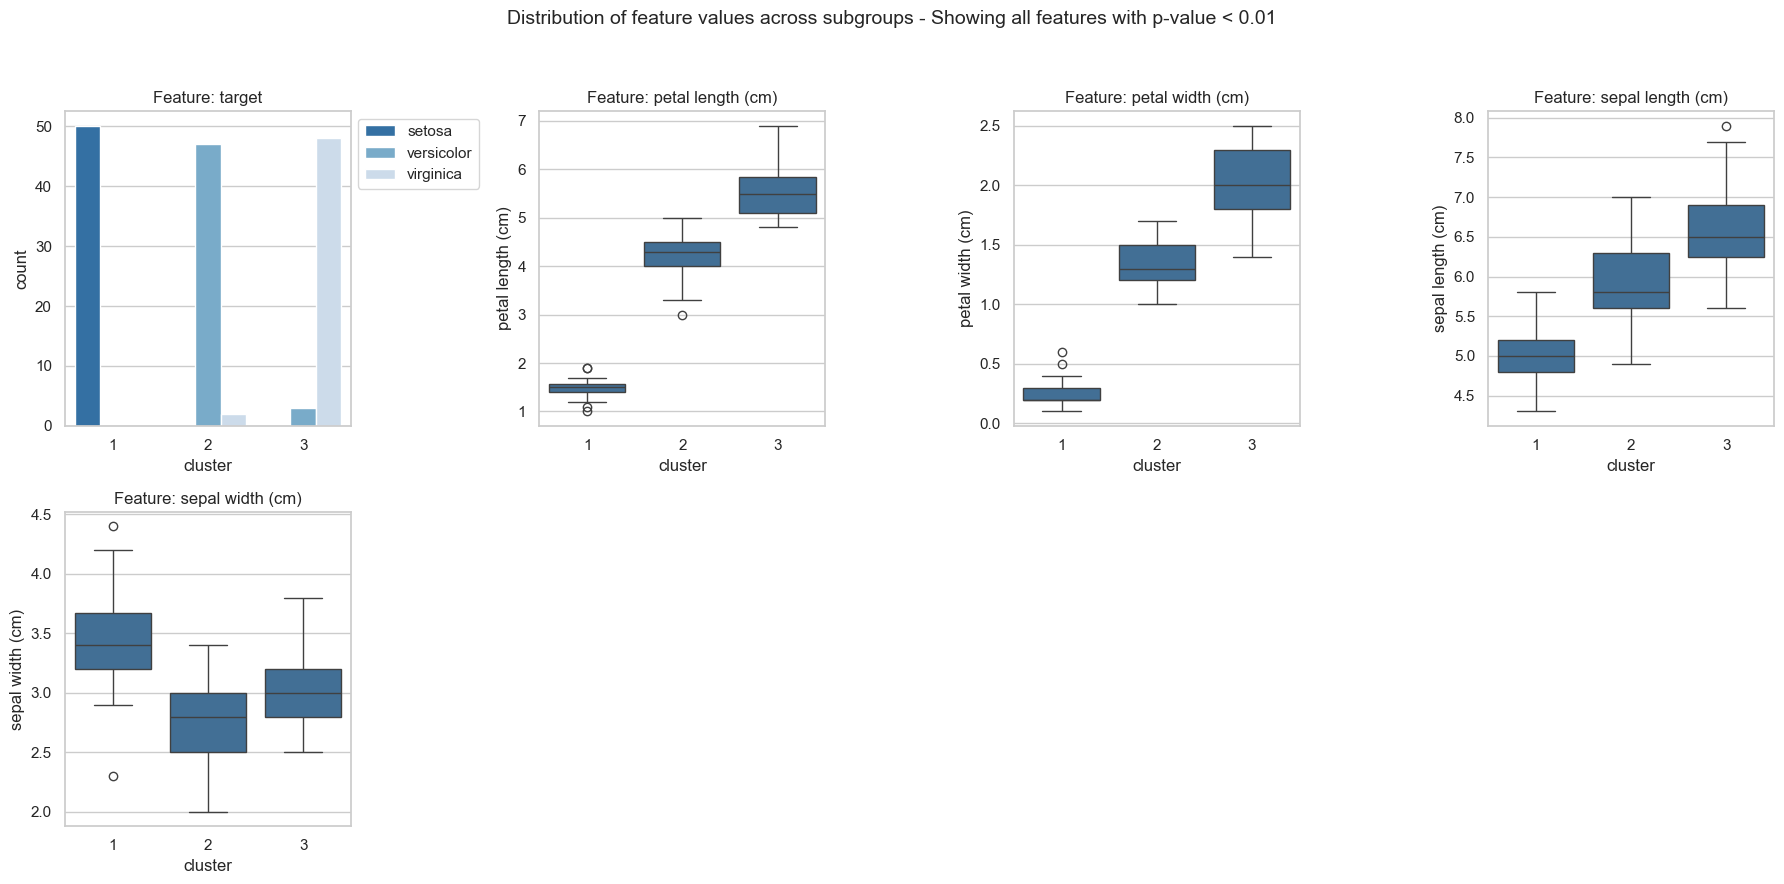

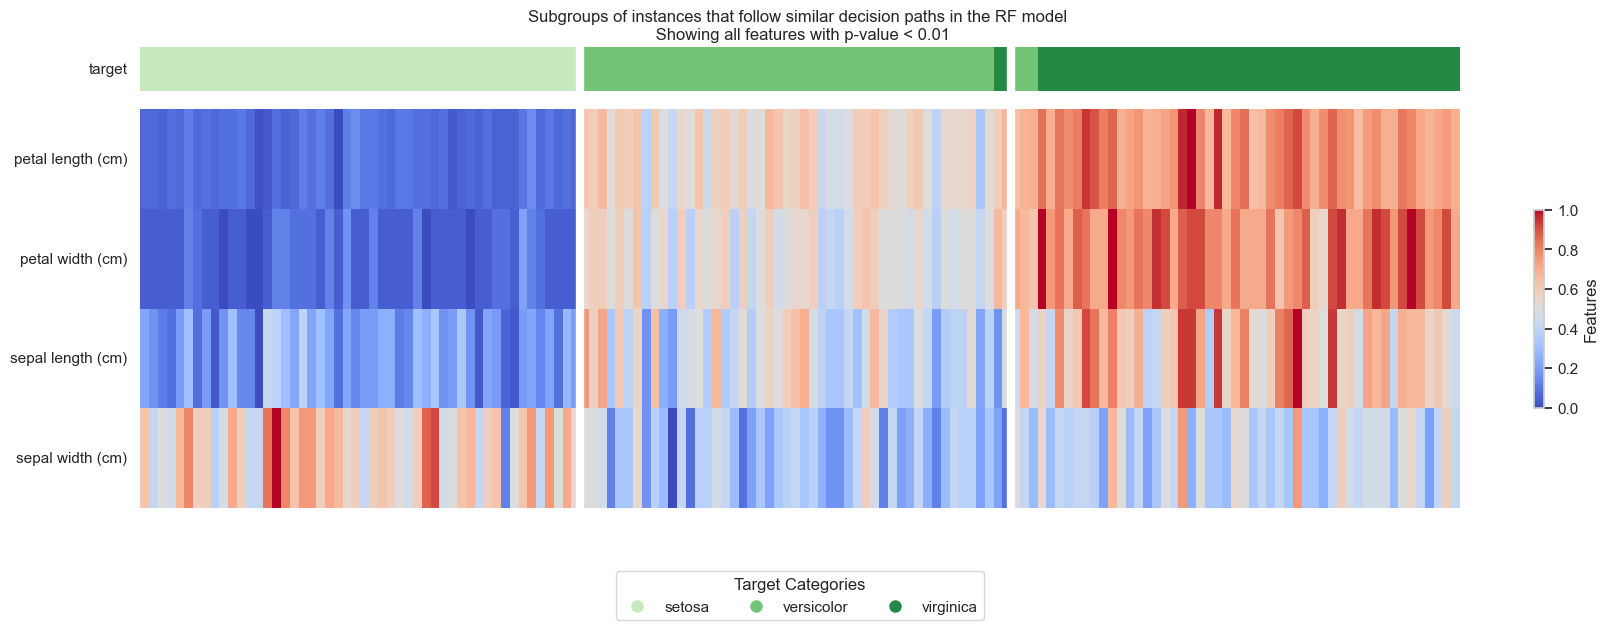

In [7]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=4)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=4)

## Multiclass Classification: Penguins Dataset

In [8]:
data_penguins = load_penguins()
data_penguins.rename(columns={'species':'target'}, inplace=True)

# Remove the instances with missing values and check how many we are left with
print(f"Before omiting the missing values the dataset has {data_penguins.shape[0]} instances")
data_penguins.dropna(inplace=True)
print(f"After omiting the missing values the dataset has {data_penguins.shape[0]} instances")

# preprocess categorical features such that they can be used for the RF model
data_penguins_encoded = pd.get_dummies(data_penguins, columns=['island', 'sex'], prefix=['island', 'sex'], drop_first=True)

X_penguins = data_penguins_encoded.loc[:, data_penguins_encoded.columns != 'target']
y_penguins = data_penguins_encoded.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_penguins, y_penguins)
rf_penguins = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_penguins.oob_score_)

Before omiting the missing values the dataset has 344 instances
After omiting the missing values the dataset has 333 instances
Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.984984984984985


In [9]:
fgc = FgClustering(model=rf_penguins, data=data_penguins_encoded, target_column='target')
fgc.run()

Interpreting RandomForestClassifier


 17%|█▋        | 1/6 [00:00<00:01,  3.44it/s]

For number of cluster 2 the Jaccard Index is 0.9160289493578838
For number of cluster 2 the score is 0.32933697175607646


 33%|███▎      | 2/6 [00:00<00:01,  2.51it/s]

For number of cluster 3 the Jaccard Index is 0.9952883877989059
For number of cluster 3 the score is 0.018666445142142996


 50%|█████     | 3/6 [00:01<00:01,  1.82it/s]

For number of cluster 4 the Jaccard Index is 0.9718654376806184
For number of cluster 4 the score is 0.07721157852502875


 67%|██████▋   | 4/6 [00:02<00:01,  1.32it/s]

For number of cluster 5 the Jaccard Index is 0.542860857827226
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [00:03<00:00,  1.06it/s]

For number of cluster 6 the Jaccard Index is 0.8737253192050606
For number of cluster 6 the score is 0.02112436148148152


100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

For number of cluster 7 the Jaccard Index is 0.4526426851667004
Clustering is instable, no score computed!
Optimal number of cluster is: 3


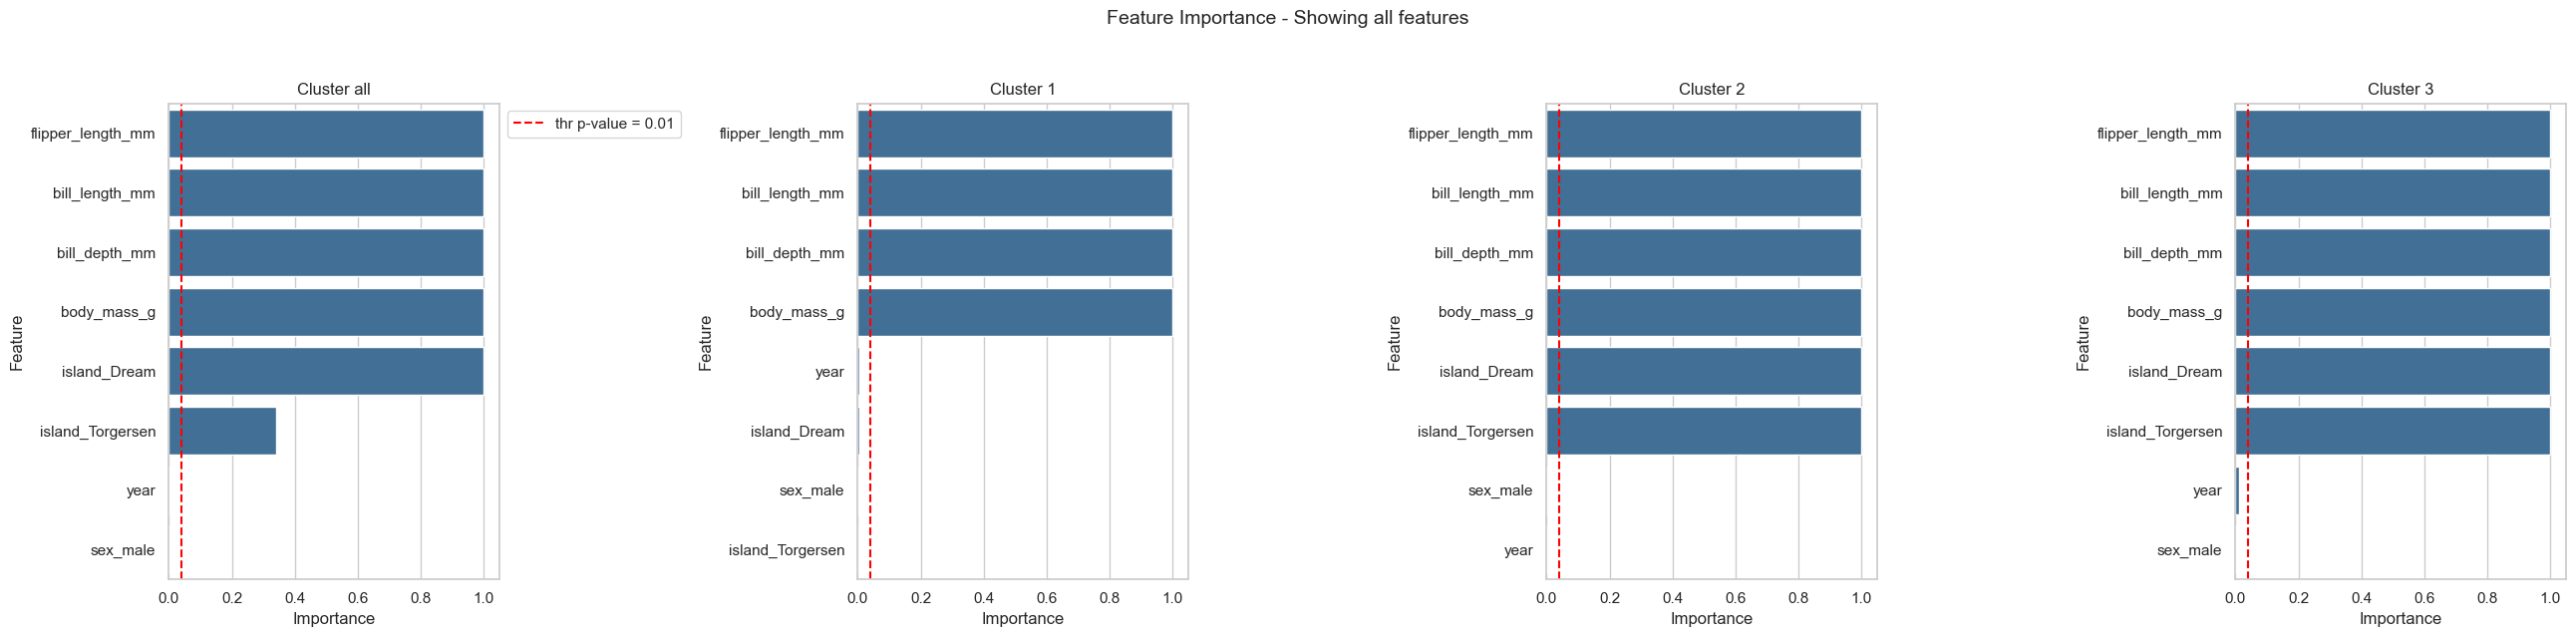

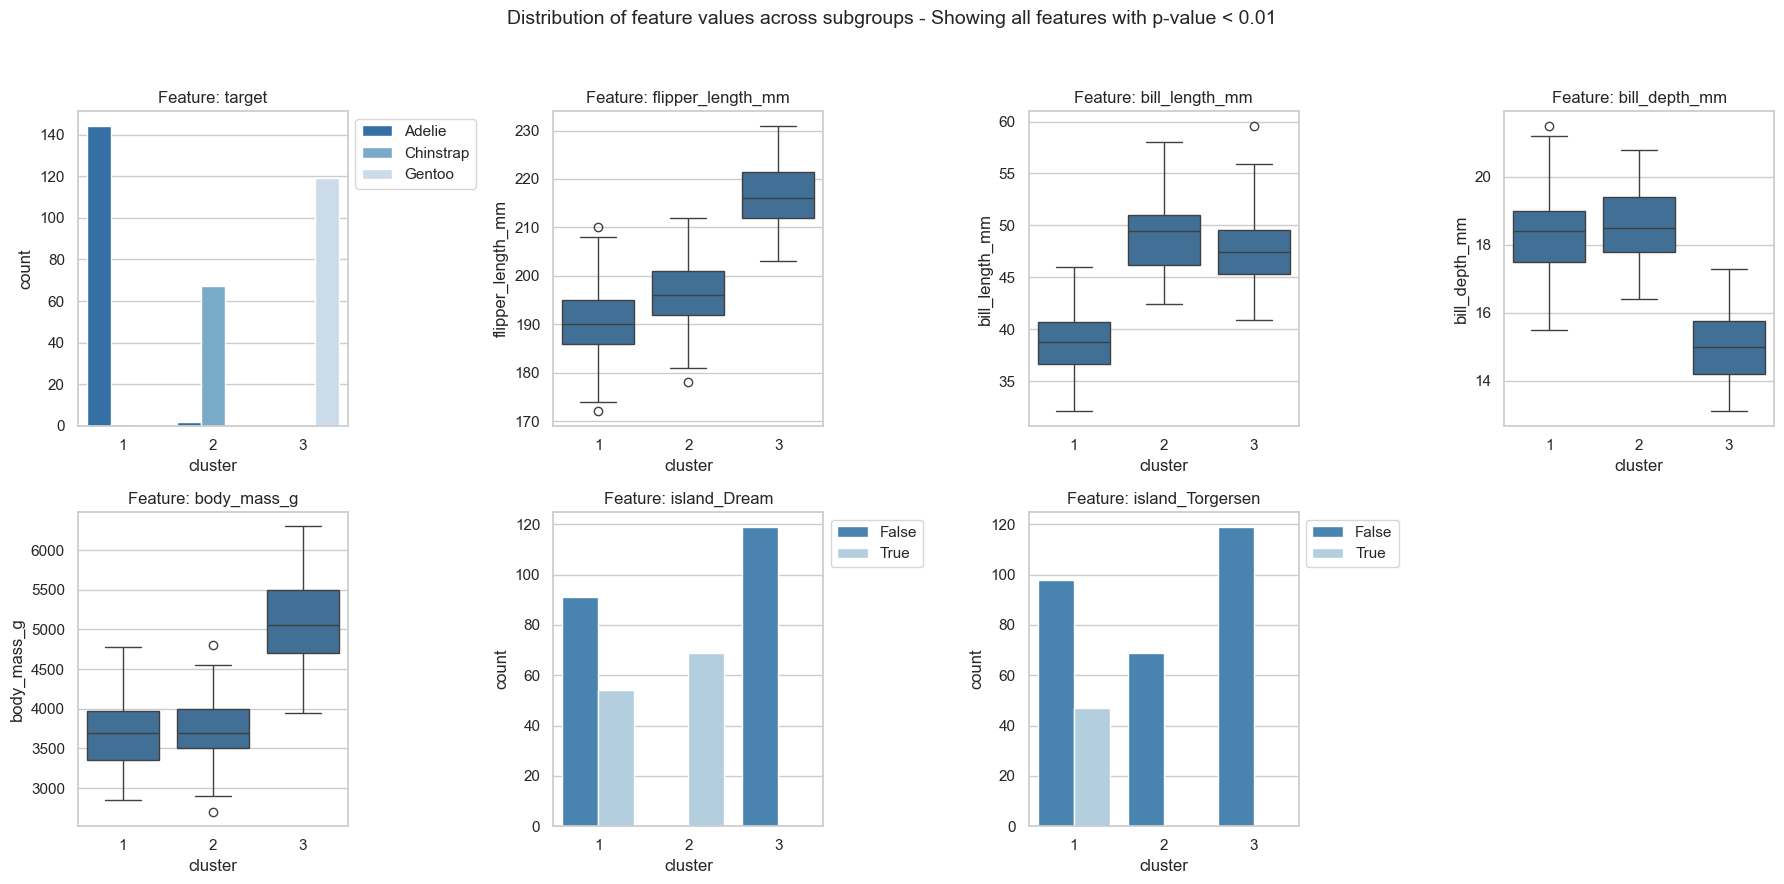

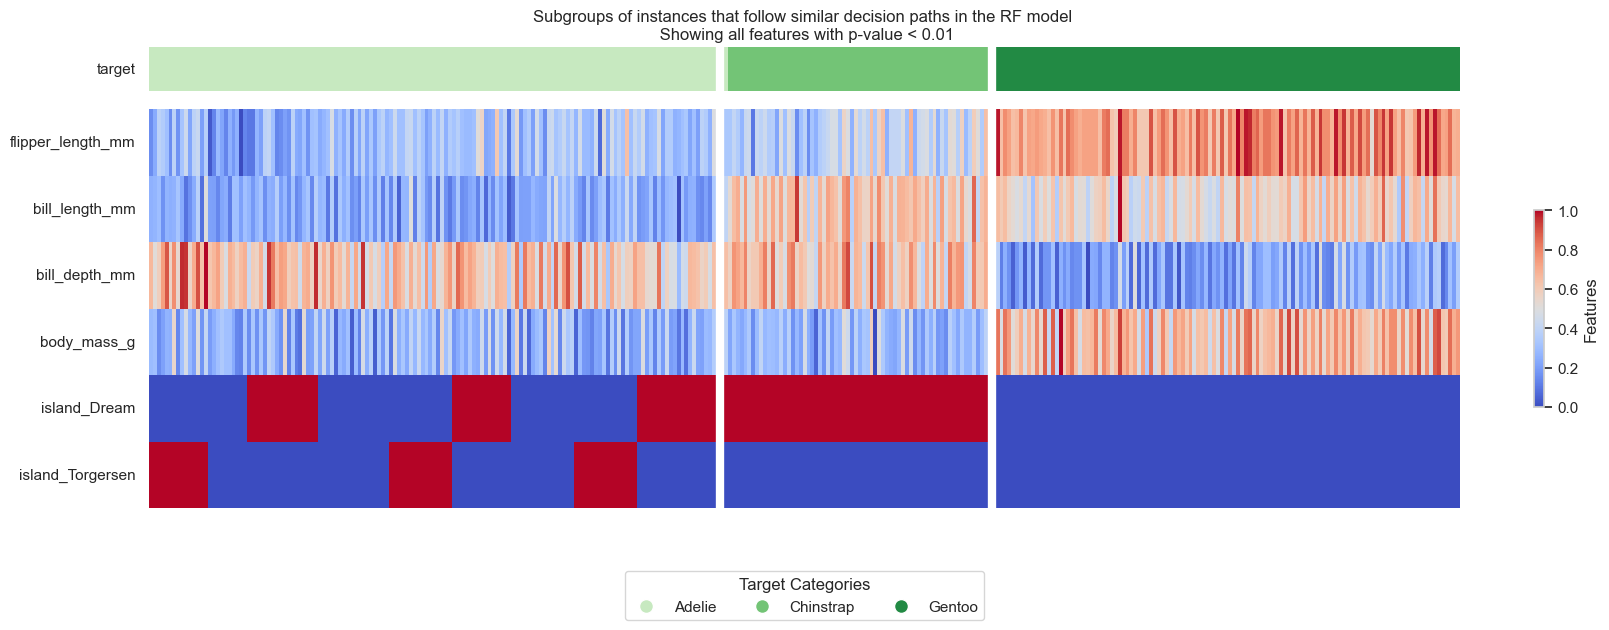

In [10]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=4)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=4)

In [11]:
X = data_penguins.drop('target', axis=1)
X['island'] = X['island'].astype('category')
X['sex'] = X['sex'].astype('category')

fgc.calculate_statistics(X, target_column=data_penguins.target)

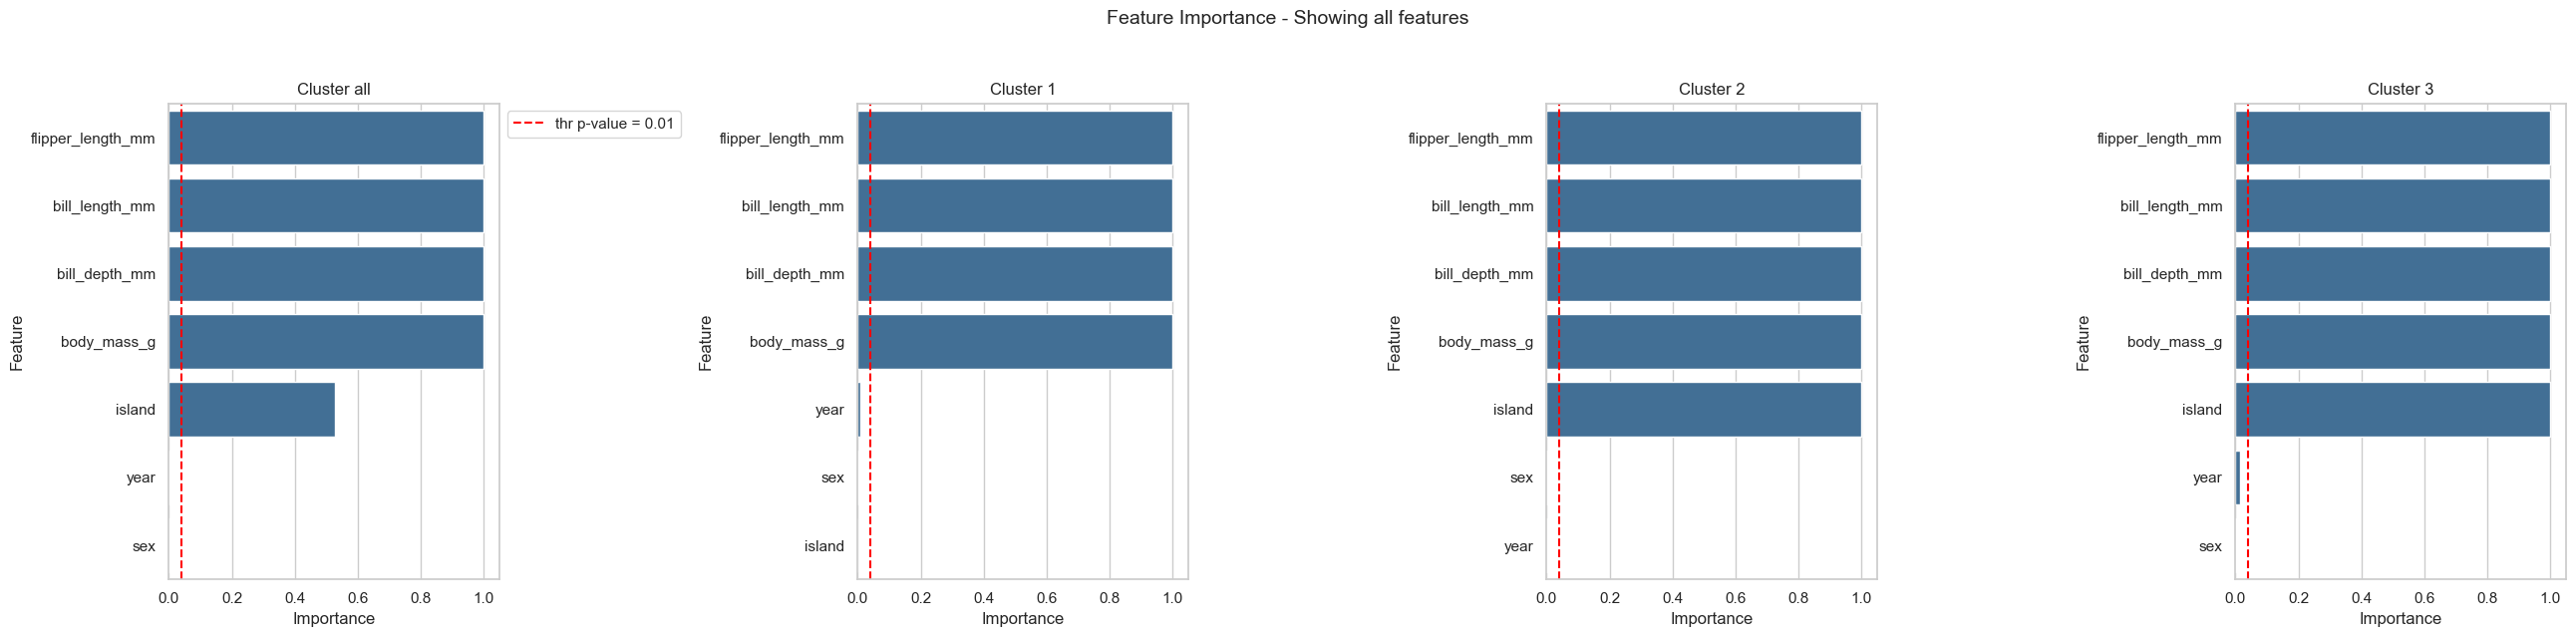

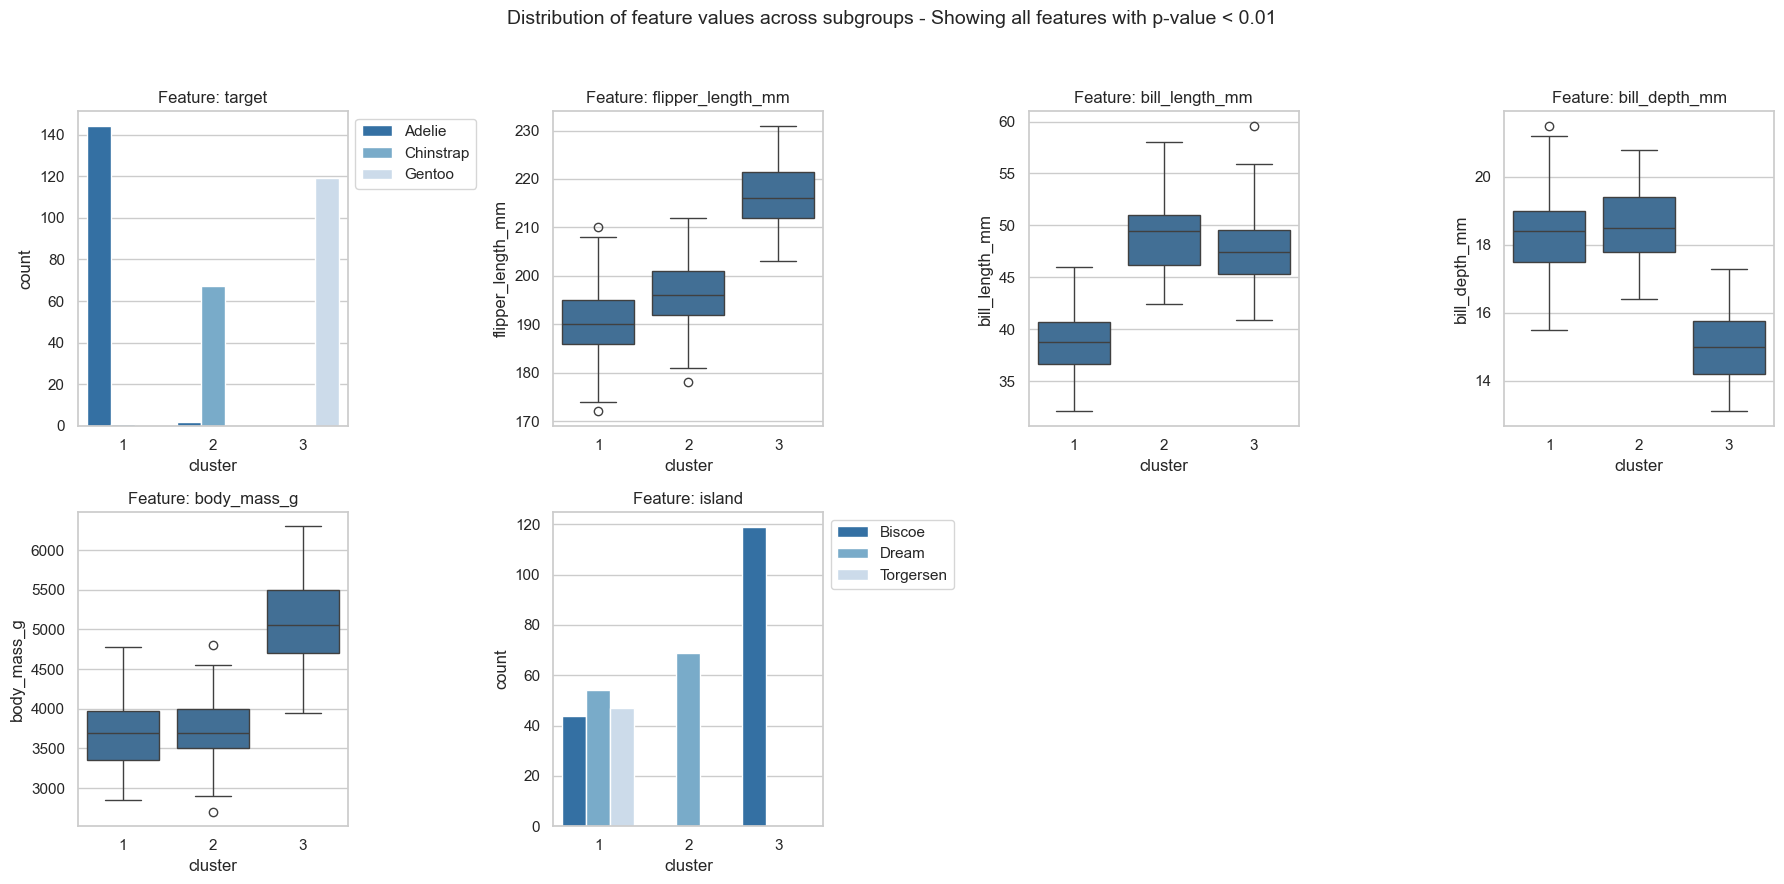

In [12]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=4)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=4, heatmap_type="interactive")

## Regression: California Housing Dataset

In [13]:
data_housing = fetch_california_housing(as_frame=True)
data_housing = data_housing.frame
data_housing.rename(columns={'MedHouseVal':'target'}, inplace=True)

# for sake of runtime we only use the first 3000 samples
data_housing = data_housing[:3000]
data_housing.head()

X_housing = data_housing.loc[:, data_housing.columns != 'target']
y_housing = data_housing.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestRegressor(n_estimators=100, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_housing, y_housing)
rf_housing = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB R^2 of prediction model:')
print(rf_housing.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'log2'}
OOB R^2 of prediction model:
0.8143895694575555


In [14]:
fgc = FgClustering(model=rf_housing, data=data_housing, target_column='target')
fgc.run(method_clustering='pam', init_clustering='random', n_jobs=6)

Interpreting RandomForestRegressor


 17%|█▋        | 1/6 [00:15<01:19, 15.92s/it]

For number of cluster 2 the Jaccard Index is 0.8512868664366318
For number of cluster 2 the score is 2647.0841058748933


 33%|███▎      | 2/6 [00:34<01:09, 17.40s/it]

For number of cluster 3 the Jaccard Index is 0.8249949228803015
For number of cluster 3 the score is 2397.9829201428356


 50%|█████     | 3/6 [01:07<01:14, 24.74s/it]

For number of cluster 4 the Jaccard Index is 0.57153986378571
Clustering is instable, no score computed!


 67%|██████▋   | 4/6 [01:39<00:54, 27.42s/it]

For number of cluster 5 the Jaccard Index is 0.41148469529268306
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [02:22<00:32, 32.98s/it]

For number of cluster 6 the Jaccard Index is 0.7744198205831639
For number of cluster 6 the score is 1024.1875551292037


100%|██████████| 6/6 [03:19<00:00, 33.24s/it]

For number of cluster 7 the Jaccard Index is 0.46727785503357516
Clustering is instable, no score computed!
Optimal number of cluster is: 6


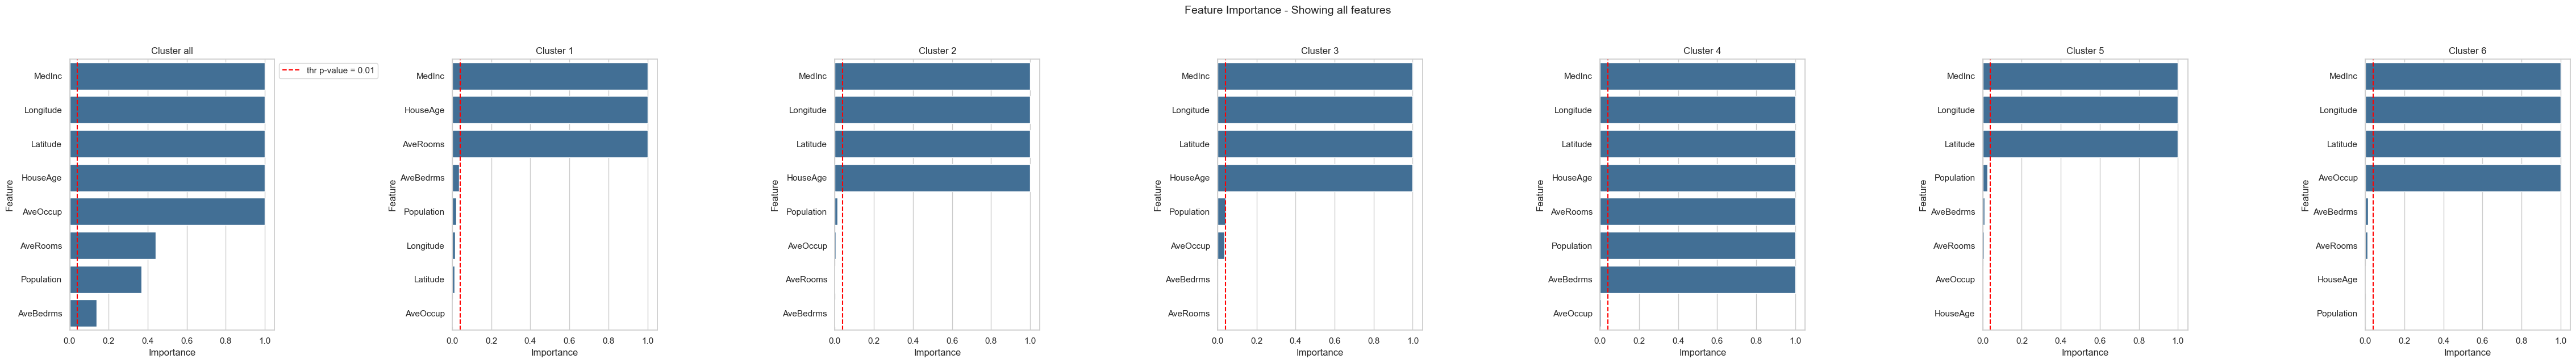

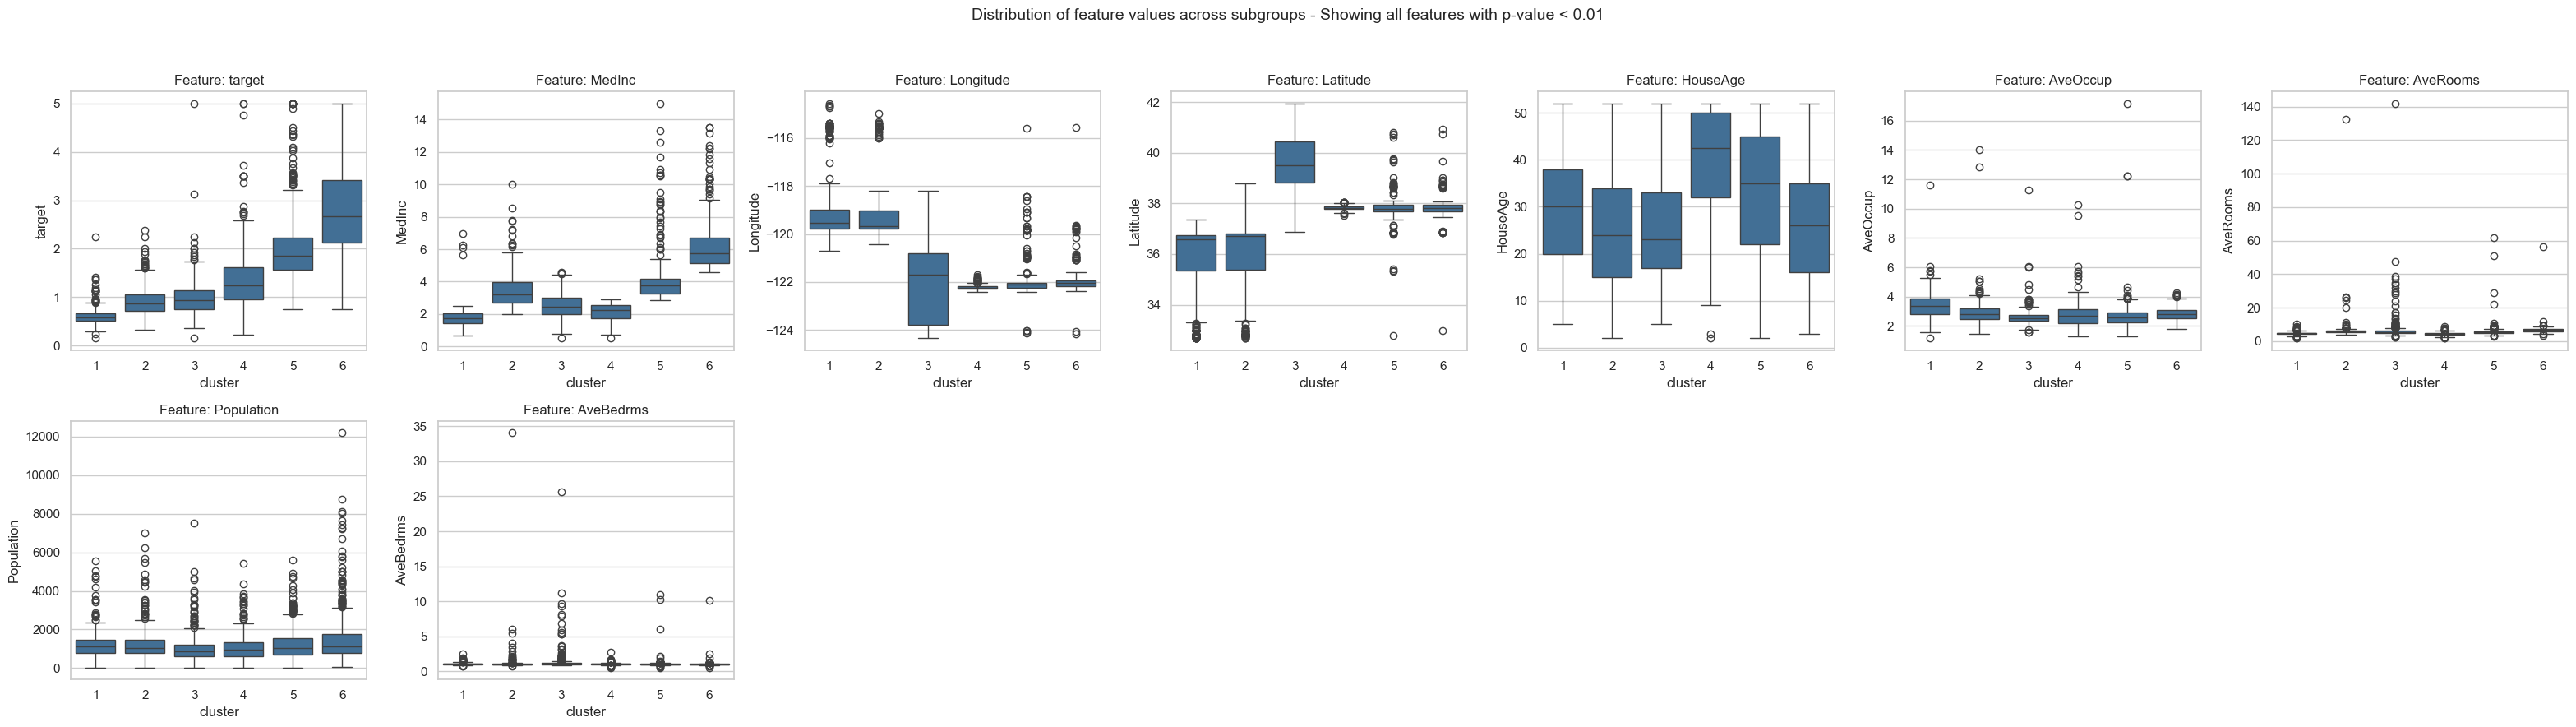

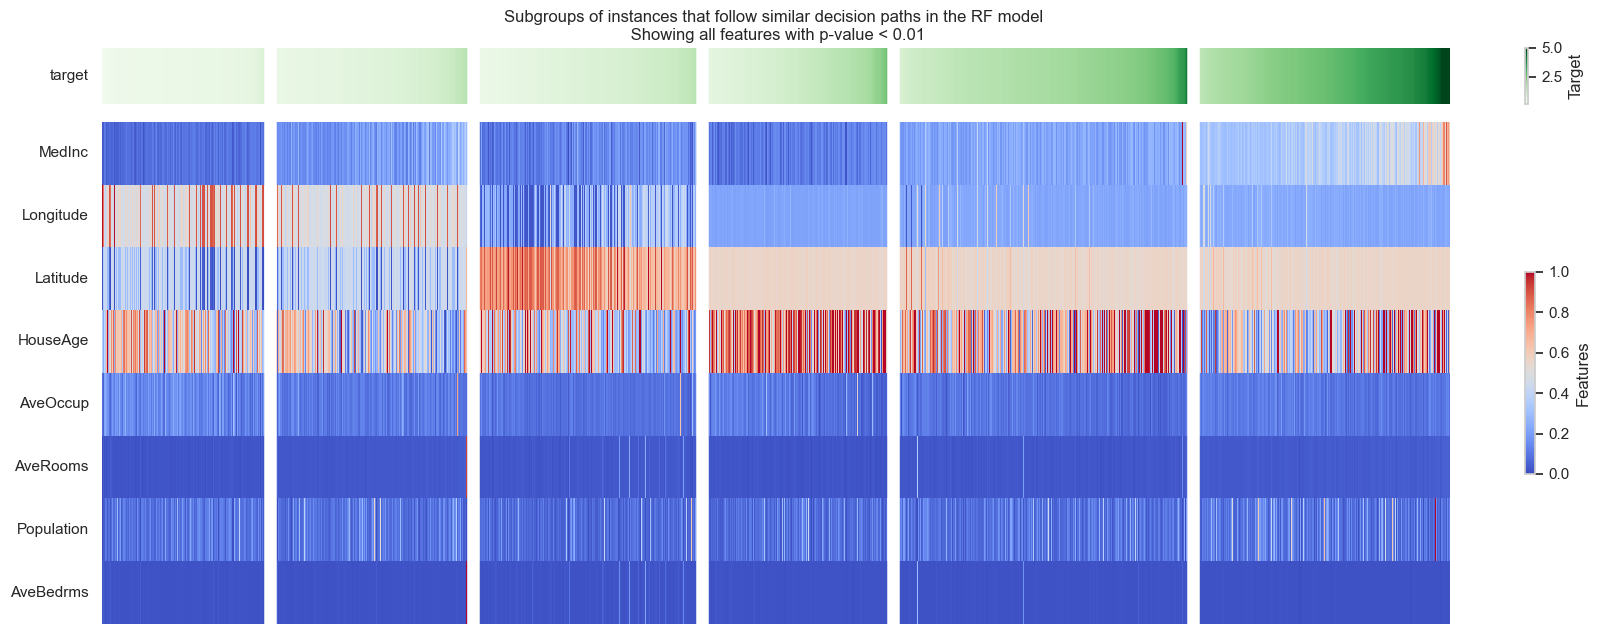

In [15]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=7)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=7)

In [16]:
fgc_fast = FgClustering(model=rf_housing, data=data_housing, target_column='target')
fgc_fast.run(method_clustering='alternate', init_clustering='random', n_jobs=6)

Interpreting RandomForestRegressor


 17%|█▋        | 1/6 [00:04<00:21,  4.24s/it]

For number of cluster 2 the Jaccard Index is 0.9089850809055678
For number of cluster 2 the score is 1909.6995878481864


 33%|███▎      | 2/6 [00:09<00:18,  4.64s/it]

For number of cluster 3 the Jaccard Index is 0.6031223500233672
For number of cluster 3 the score is 1997.8183905229025


 50%|█████     | 3/6 [00:13<00:13,  4.59s/it]

For number of cluster 4 the Jaccard Index is 0.3472991256782328
Clustering is instable, no score computed!


 67%|██████▋   | 4/6 [00:17<00:08,  4.44s/it]

For number of cluster 5 the Jaccard Index is 0.40887436020259627
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [00:22<00:04,  4.38s/it]

For number of cluster 6 the Jaccard Index is 0.5429240468815171
Clustering is instable, no score computed!


100%|██████████| 6/6 [00:27<00:00,  4.55s/it]

For number of cluster 7 the Jaccard Index is 0.3636961052238196
Clustering is instable, no score computed!
Optimal number of cluster is: 2


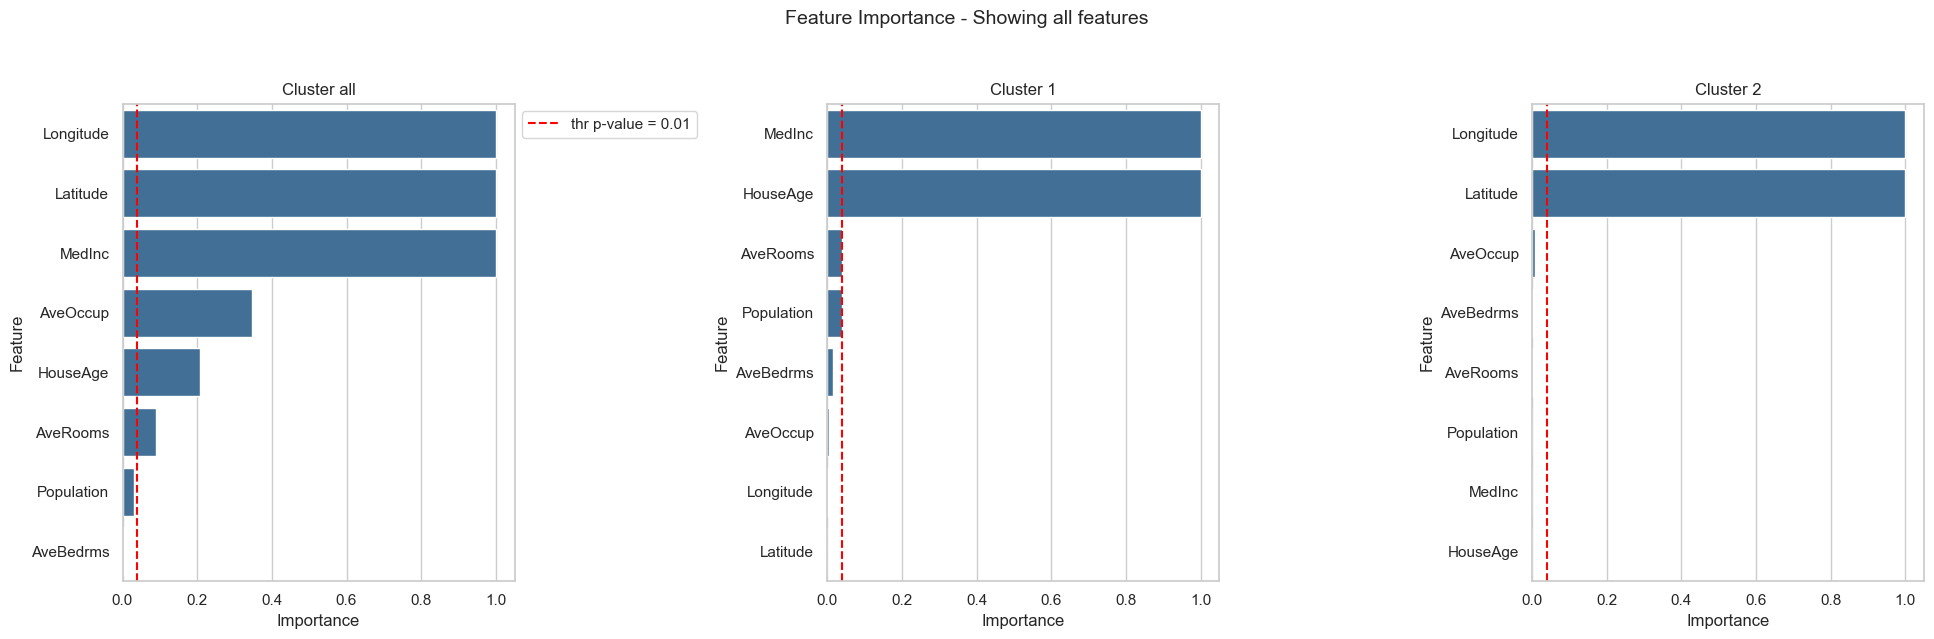

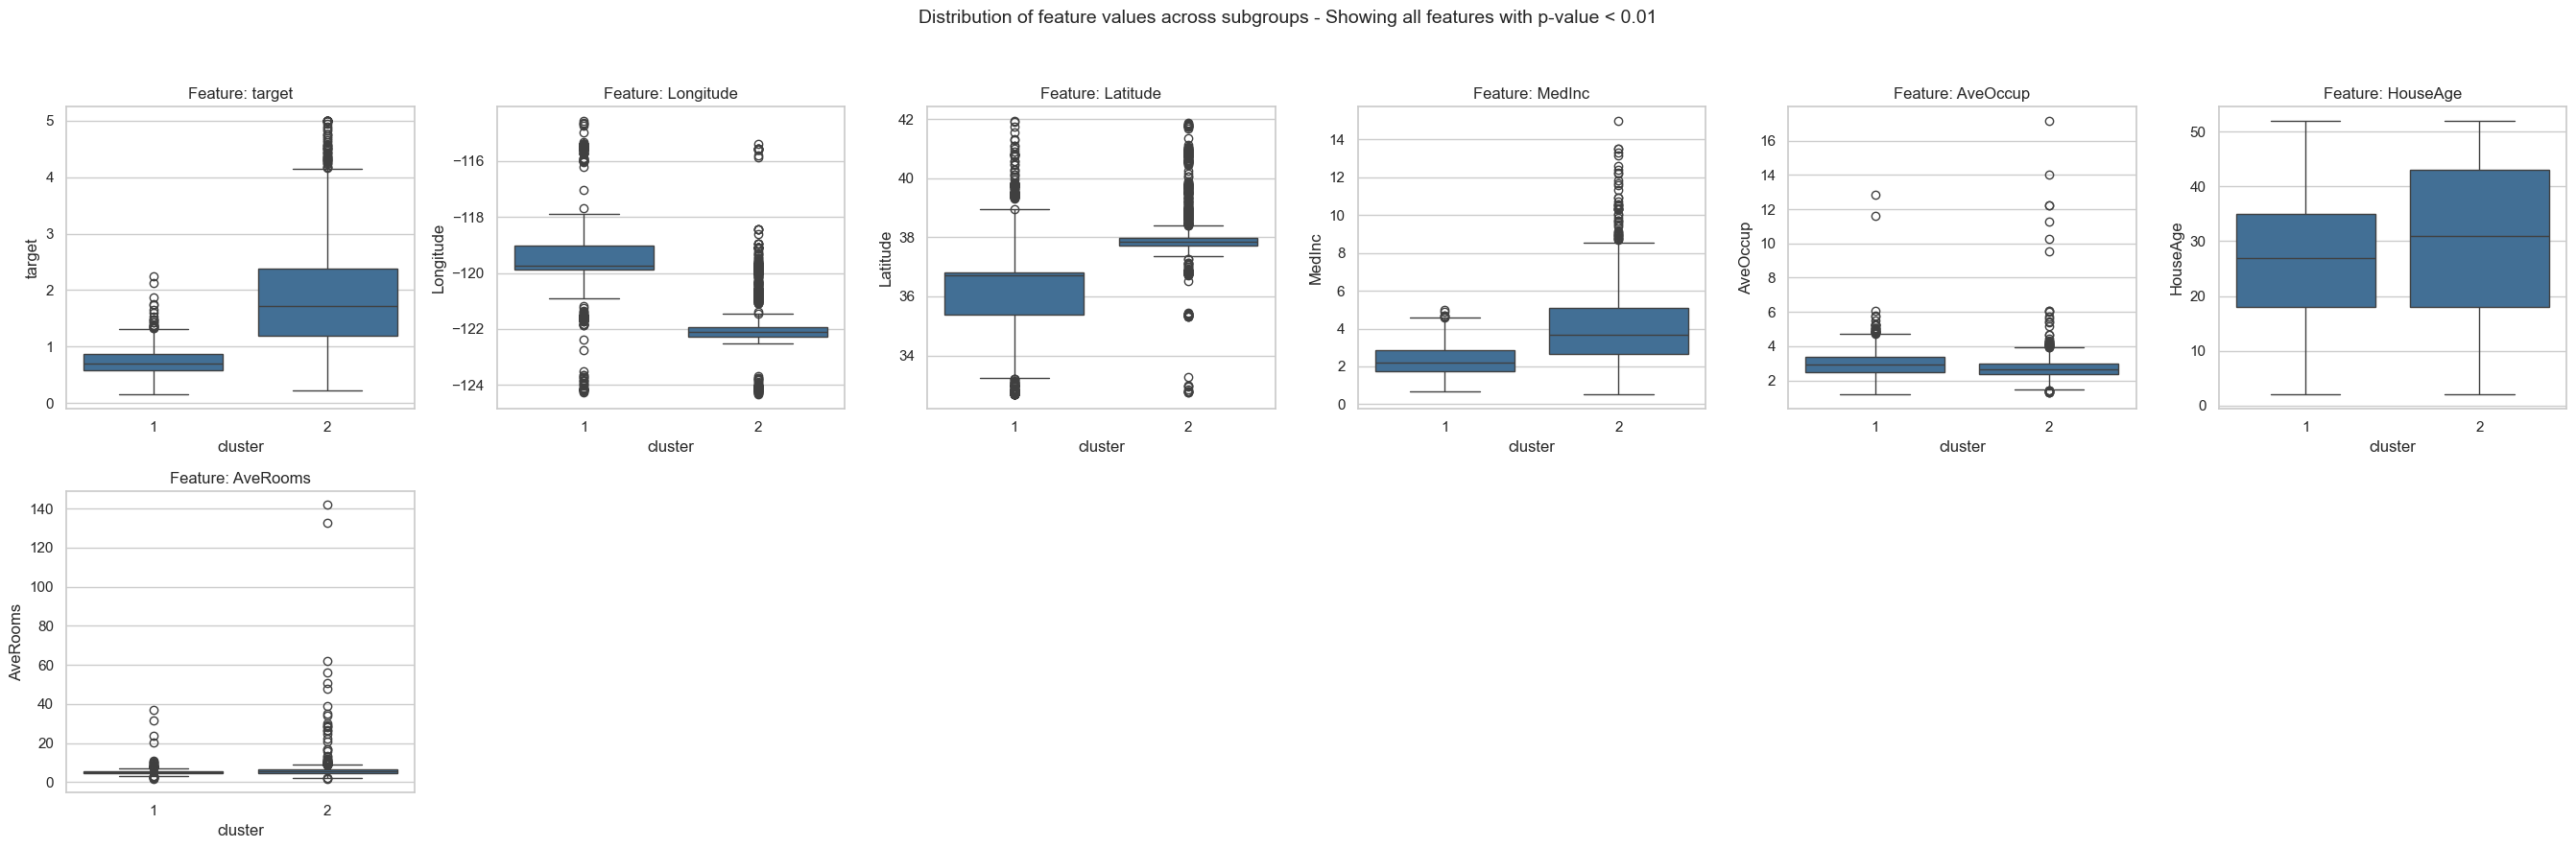

In [17]:
fgc_fast.plot_feature_importance(thr_pvalue=0.01)
fgc_fast.plot_decision_paths(thr_pvalue=0.01, heatmap_type="interactive")